In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd

In [3]:
# Unpack the dataset - uncomment the line below to run
!tar -xzf aclImdb_v1.tar.gz

In [4]:
# Define paths to dataset
train_pos_path = 'aclImdb/train/pos' # Path to the directory containing positive reviews from the training set
train_neg_path = 'aclImdb/train/neg' # Path to the directory containing negative reviews from the training set
test_pos_path = 'aclImdb/test/pos' # Path to the directory containing positive reviews from the test set
test_neg_path = 'aclImdb/test/neg' # Path to the directory containing negative reviews from the test set

In [5]:
def load_dataset(folder):
    """
    Reads all text files in the specified folder and returns their content as a list.

    Args:
        folder (str): Path to the folder containing text files.

    Returns:
        list: A list of strings, where each string is the content of a text file.
    """
    #TODO: Implement the function here
    reviews = []
    for filename in os.listdir(folder):
        if filename.endswith('.txt'):
            filepath = os.path.join(folder, filename)
            with open(filepath, 'r', encoding='utf-8') as f:
                reviews.append(f.read())
    return reviews

In [6]:
# Load training and testing data
train_pos = load_dataset('aclImdb/train/pos')
train_neg = load_dataset('aclImdb/train/neg')
test_pos = load_dataset('aclImdb/test/pos')
test_neg = load_dataset('aclImdb/test/neg')

In [7]:
print(f"Train positive: {len(train_pos)}")
print(f"Train negative: {len(train_neg)}")
print(f"Test positive: {len(test_pos)}")
print(f"Test negative: {len(test_neg)}")

Train positive: 12500
Train negative: 12500
Test positive: 12500
Test negative: 12500


In [8]:
# Create DataFrames
train_df = pd.DataFrame({
    'review': train_pos + train_neg,
    'label': [1] * len(train_pos) + [0] * len(train_neg)
})

test_df = pd.DataFrame({
    'review': test_pos + test_neg,
    'label': [1] * len(test_pos) + [0] * len(test_neg)
})

print(train_df.head())

                                              review  label
0  Silly, hilarious, tragic, sad, inevitable.<br ...      1
1  I actually like the original, and this film ha...      1
2  For my humanities quarter project for school, ...      1
3  To me this was more a wake up call, and realiz...      1
4  This movie is a lot of fun. What makes it grea...      1


In [9]:
# Dataset Overview
print("=== Training Dataset Info ===")
train_df.info()
print("\n=== Training Dataset Statistics ===")
print(train_df.describe())

=== Training Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB

=== Training Dataset Statistics ===
             label
count  25000.00000
mean       0.50000
std        0.50001
min        0.00000
25%        0.00000
50%        0.50000
75%        1.00000
max        1.00000


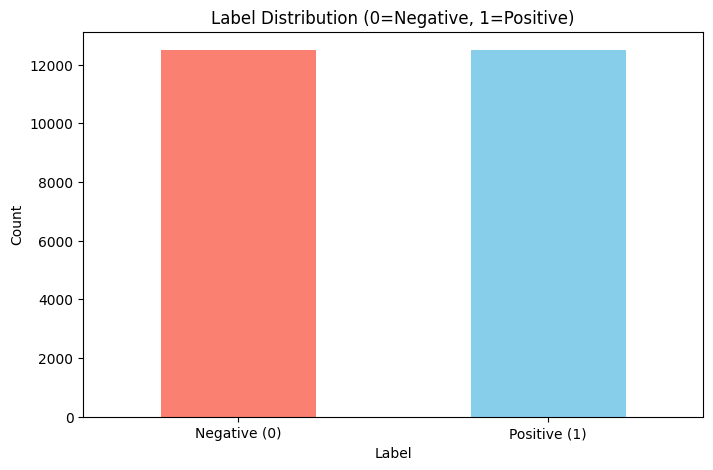

In [10]:
# Label Distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
train_df['label'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution (0=Negative, 1=Positive)')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'], rotation=0)
plt.show()

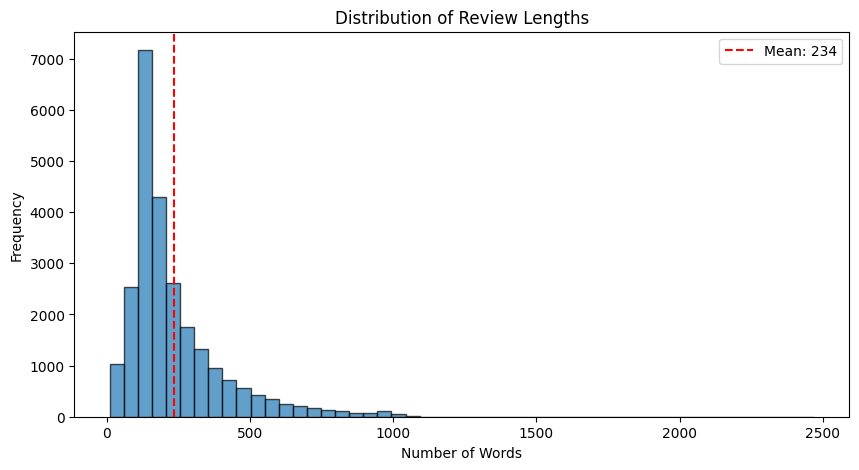

Mean word count: 233.79
Median word count: 174.00
Max word count: 2470


In [11]:
# Review Length Analysis (word count)
train_df['word_count'] = train_df['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
plt.hist(train_df['word_count'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.axvline(train_df['word_count'].mean(), color='red', linestyle='--', label=f"Mean: {train_df['word_count'].mean():.0f}")
plt.legend()
plt.show()

print(f"Mean word count: {train_df['word_count'].mean():.2f}")
print(f"Median word count: {train_df['word_count'].median():.2f}")
print(f"Max word count: {train_df['word_count'].max()}")

In [12]:
# Sample Reviews
print("=== Sample Positive Review ===")
print(train_df[train_df['label'] == 1]['review'].iloc[0][:500])

print("\n=== Sample Negative Review ===")
print(train_df[train_df['label'] == 0]['review'].iloc[0][:500])

=== Sample Positive Review ===
Silly, hilarious, tragic, sad, inevitable.<br /><br />A group of down-and-outs team up with a "seasoned" crook to elevate themselves out of their poverty. Great idea...if you ignore the screwup factor.<br /><br />Nice to see George Clooney doing something genuinely funny for a change. The casting is perfect and the acting standards very high. Although it could be said that the motley crew subject isn't new, I think this movie handles it in an interesting and unique way. Sufficiently so that it s

=== Sample Negative Review ===
Ah yez, the Sci Fi Channel produces Yeti another abominable movie. I was particularly taken by the scenes immediately following the crash where, as the survivors desperately searched for matches, at least a half dozen fires burned  with no apparent reason  at various points of the wreckage. Fire seemed to be a predominate theme throughout. They searched corpses for lighters and matches, and finally finding a box built a fire every

In [13]:
# Split train data into training and validation sets manually
train_size = int(0.9 * len(train_df))
# Shuffle the dataset
shuffled_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
train_data = shuffled_df.iloc[:train_size]
val_data = shuffled_df.iloc[train_size:]

In [14]:
#Verify
print(f"Training samples: {len(train_data)}")
print(f"Validation samples: {len(val_data)}")

Training samples: 22500
Validation samples: 2500


In [15]:
from transformers import AutoTokenizer
# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [16]:
#Test
sample_text = "I Love Transformers."
tokens = tokenizer.tokenize(sample_text)
token_ids = tokenizer.encode(sample_text)
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")

Tokens: ['i', 'love', 'transformers', '.']
Token IDs: [101, 1045, 2293, 19081, 1012, 102]


In [17]:
# Take sample inputs from the dataset
sample_texts = train_data['review'].sample(3, random_state=42).tolist()
# Tokenize sample inputs
tokenized_samples = tokenizer(sample_texts, truncation=True, padding="max_length", max_length=128, return_tensors="pt")

In [18]:
#Inspect the output
print(tokenized_samples.keys())
print(f"Input IDs shape: {tokenized_samples['input_ids'].shape}")
print(f"Attention mask shape: {tokenized_samples['attention_mask'].shape}")

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
Input IDs shape: torch.Size([3, 128])
Attention mask shape: torch.Size([3, 128])


In [19]:
print(tokenized_samples)

{'input_ids': tensor([[  101,  1996, 10828,  2006,  2029,  2023,  3185,  2003,  2241,  3464,
          2028,  1997,  1996,  2087,  2540,  1011, 14916,  4667,  2808,  1045,
          2031,  2412,  3191,  1012,  2009,  4136,  1996,  6429,  3441,  1997,
          2048,  5208,  1010,  2119,  2040,  3687, 13347,  1998,  4847,  2551,
          2092,  2046,  2037,  3963,  1005,  1055,  2004,  1037,  3836,  1998,
          1037, 24385,  1010,  2059,  2973,  2178,  2382,  2086,  2007, 13372,
          1012, 10090,  9266, 15539,  1996,  2143,  2007,  2014,  6669, 16371,
          6651,  2094,  2836,  2004,  1996, 22614,  1000,  2304,  2121,  1000,
         29298,  1010,  1996, 24385,  1012,  2016,  2025,  2069, 16783,  2014,
          4963,  1010, 17076,  3367,  1010,  1998,  9866,  2092,  1025,  2016,
         11082,  2017,  2113,  3599,  2073,  2027,  1005,  2310,  2272,  2013,
          2478,  2019,  4610,  1997,  2616,  1012, 22939,  7295,  2078, 10767,
          2038,  1996,  2514,  1997,  

In [20]:
import torch
from torch.utils.data import Dataset
MAX_LENGTH = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [21]:
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    """
    A custom PyTorch Dataset for the IMDB dataset.

    This class preprocesses text data using a tokenizer and returns tokenized inputs
    along with their corresponding labels for sentiment analysis.

    Attributes:
        data (pd.DataFrame): A DataFrame containing text and label columns.
        tokenizer (transformers.PreTrainedTokenizer): The tokenizer used for preprocessing text.
        max_length (int): Maximum length for tokenized sequences.
    """
    def __init__(self, data, tokenizer, max_length=MAX_LENGTH):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text = self.data.iloc[idx]['review']
        label = self.data.iloc[idx]['label']
        
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        
        return encoding['input_ids'].flatten(), label

In [22]:
# Initialize the datasets
train_dataset = IMDBDataset(train_data, tokenizer)
val_dataset = IMDBDataset(val_data, tokenizer)
test_dataset = IMDBDataset(test_df, tokenizer)

In [23]:
#Verify
print(f"Train dataset: {len(train_dataset)}")
print(f"Val dataset: {len(val_dataset)}")
print(f"Test dataset: {len(test_dataset)}")

Train dataset: 22500
Val dataset: 2500
Test dataset: 25000


In [24]:
from torch.utils.data import DataLoader

# Define batch size
BATCH_SIZE = 32

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [25]:
#Verify
print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

Train batches: 704
Val batches: 79
Test batches: 782


In [26]:
assert len(train_dataset) == 22500, "Train dataset length mismatch!"
assert len(val_dataset) == 2500, "Validation dataset length mismatch!"
assert len(test_dataset) == 25000, "Test dataset length mismatch!"

import numpy as np

# Check the first item in the train dataset
input_ids, label = train_dataset[0]
assert isinstance(input_ids, torch.Tensor), "Input IDs should be a torch.Tensor!"
assert isinstance(label, (int, np.integer)), "Label should be an integer or int-like!"

# Ensure the input IDs tensor has the correct shape
assert input_ids.shape[0] == train_dataset.max_length, "Input IDs tensor has incorrect length!"

In [27]:
config = {
    "vocabulary_size": tokenizer.vocab_size,  # e.g., ~30522 for bert-base-uncased
    "num_classes": 2,                         # binary classification (pos/neg)
    "d_embed": 128,
    "context_size": MAX_LENGTH,
    "layers_num": 4,
    "heads_num": 4,
    "head_size": 32,  # 4 heads * 32 = 128 -> matches d_embed
    "dropout_rate": 0.1,
    "use_bias": True
}

In [28]:
import torch.nn as nn
import math

class AttentionHead(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.Q_weights = nn.Linear(config["d_embed"], config["head_size"], bias=config["use_bias"])
        self.K_weights = nn.Linear(config["d_embed"], config["head_size"], bias=config["use_bias"])
        self.V_weights = nn.Linear(config["d_embed"], config["head_size"], bias=config["use_bias"])

        self.dropout = nn.Dropout(config["dropout_rate"])

        casual_attention_mask = torch.tril(torch.ones(config["context_size"], config["context_size"]))
        self.register_buffer('casual_attention_mask', casual_attention_mask)

    def forward(self, input):
        batch_size, tokens_num, d_embed = input.shape
        Q = self.Q_weights(input)  # (B, T, head_size)
        K = self.K_weights(input)  # (B, T, head_size)
        V = self.V_weights(input)  # (B, T, head_size)

        # Q @ K^T => (B, T, T)
        attention_scores = Q @ K.transpose(1, 2)

        # Casual Mask
        attention_scores = attention_scores.masked_fill(
            self.casual_attention_mask[:tokens_num, :tokens_num] == 0,
            float('-inf')
        )
        attention_scores = attention_scores / math.sqrt(K.shape[-1])
        attention_scores = torch.softmax(attention_scores, dim=-1)
        attention_scores = self.dropout(attention_scores)

        return attention_scores @ V

In [29]:
# Instantiate the AttentionHead
attention_head = AttentionHead(config).to(device)

# Create a dummy input of shape (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
attention_output = attention_head(dummy_input)
print("AttentionHead output shape:", attention_output.shape)

AttentionHead output shape: torch.Size([32, 128, 32])


In [30]:
class MultiHeadAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        heads_list = [AttentionHead(config) for _ in range(config["heads_num"])]
        self.heads = nn.ModuleList(heads_list)

        self.linear = nn.Linear(config["heads_num"] * config["head_size"], config["d_embed"])
        self.dropout = nn.Dropout(config["dropout_rate"])

    def forward(self, input):
        heads_outputs = [head(input) for head in self.heads]
        x = torch.cat(heads_outputs, dim=-1)  # (B, T, heads_num * head_size)
        x = self.linear(x)                   # (B, T, d_embed)
        x = self.dropout(x)
        return x

In [31]:
# Instantiate MultiHeadAttention
multi_head_attention = MultiHeadAttention(config).to(device)

# Same dummy input: (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
mha_output = multi_head_attention(dummy_input)
print("MultiHeadAttention output shape:", mha_output.shape)

MultiHeadAttention output shape: torch.Size([32, 128, 128])


In [32]:
class FeedForward(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.linear_layers = nn.Sequential(
            nn.Linear(config["d_embed"], 4 * config["d_embed"]),
            nn.GELU(),
            nn.Linear(4 * config["d_embed"], config["d_embed"]),
            nn.Dropout(config["dropout_rate"])
        )

    def forward(self, input):
        return self.linear_layers(input)

In [33]:
# Instantiate FeedForward
feed_forward = FeedForward(config).to(device)

# Dummy input: (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
ff_output = feed_forward(dummy_input)
print("FeedForward output shape:", ff_output.shape)

FeedForward output shape: torch.Size([32, 128, 128])


In [34]:
class Block(nn.Module):
    def __init__(self, config):
        super().__init__()

        self.multi_head = MultiHeadAttention(config)
        self.layer_norm_1 = nn.LayerNorm(config["d_embed"])

        self.feed_forward = FeedForward(config)
        self.layer_norm_2 = nn.LayerNorm(config["d_embed"])

    def forward(self, input):
        x = input
        x = x + self.multi_head(self.layer_norm_1(x))
        x = x + self.feed_forward(self.layer_norm_2(x))
        return x

In [35]:
# Instantiate a single Block
block = Block(config).to(device)

# Dummy input: (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
block_output = block(dummy_input)
print("Block output shape:", block_output.shape)

Block output shape: torch.Size([32, 128, 128])


In [36]:
class DemoGPT(nn.Module):
    def __init__(self, config):
        """
        Initialize the DemoGPT class with configuration parameters.

        Args:
        - config (dict): Configuration dictionary with the following keys:
            - "vocabulary_size": Size of the vocabulary.
            - "d_embed": Dimensionality of the embedding vectors.
            - "context_size": Maximum sequence length (context size).
            - "layers_num": Number of transformer layers.
            - "num_classes": Number of output classes (2 for binary classification).
        """        
        super().__init__()
        self.token_embedding_layer = nn.Embedding(config["vocabulary_size"], config["d_embed"])
        self.positional_embedding_layer = nn.Embedding(config["context_size"], config["d_embed"])
        blocks = [Block(config) for _ in range(config["layers_num"])]
        self.layers = nn.Sequential(*blocks)
        self.layer_norm = nn.LayerNorm(config["d_embed"])
        
        # Classification output layer
        self.classifier = nn.Linear(config["d_embed"], config["num_classes"], bias=False)
    
    def forward(self, token_ids):
        """
        Forward pass of the model.

        Args:
        - token_ids (torch.Tensor): Input token indices of shape (B, T), 
                                    where B is the batch size, and T is the sequence length.
        
        Returns:
        - logits (torch.Tensor): Output logits of shape (B, num_classes).
        """
        
        batch_size, tokens_num = token_ids.shape
        
        # Step 1: Create embeddings
        x = self.token_embedding_layer(token_ids)
        positions = torch.arange(tokens_num, device=token_ids.device)
        pos_embed = self.positional_embedding_layer(positions)
        x = x + pos_embed.unsqueeze(0)
        
        # Step 2: Pass through transformer layers
        x = self.layers(x)
        x = self.layer_norm(x)
        
        # Step 3: Mean pooling across time dimension
        x = torch.mean(x, dim=1)
        
        # Step 4: Generate logits
        logits = self.classifier(x)
        
        return logits

In [37]:
# Instantiate the model
demo_gpt = DemoGPT(config).to(device)

# Suppose we have a batch of size 32, each with a sequence length of 128
dummy_token_ids = torch.randint(
    0, config["vocabulary_size"], 
    (BATCH_SIZE, config["context_size"])
).to(device)

# Forward pass
logits = demo_gpt(dummy_token_ids)

print("DemoGPT output shape:", logits.shape)
print("Logits sample:\n", logits[:2])  # Print first two examples' logits

DemoGPT output shape: torch.Size([32, 2])
Logits sample:
 tensor([[-0.0269, -0.1234],
        [ 0.0130,  0.0281]], grad_fn=<SliceBackward0>)


In [38]:
# Assert that the number of logits matches the number of classes
assert logits.size(1) == config["num_classes"], (
    f"Expected number of classes {config['num_classes']}, "
    f"but got {logits.size(1)}"
)

# Assert that the batch size of the output matches the input batch size
assert logits.size(0) == BATCH_SIZE, (
    f"Expected batch size {BATCH_SIZE}, "
    f"but got {logits.size(0)}"
)

In [39]:
def calculate_accuracy(model, data_loader, device):
    """
    Calculate the accuracy of the model on the validation dataset.

    Args:
        model (torch.nn.Module): The trained transformer model.
        data_loader (torch.utils.data.DataLoader): DataLoader for the validation dataset.
        device (torch.device): Device to run the model (e.g., 'cuda' or 'cpu').

    Returns:
        float: Validation accuracy as a percentage.
    """
    
    model.eval()
    total_correct = 0
    total_samples = 0
    
    with torch.no_grad():
        for input_ids, labels in data_loader:
            input_ids = input_ids.to(device)
            labels = labels.to(device)
            
            logits = model(input_ids)
            predictions = torch.argmax(logits, dim=1)
            
            total_correct += (predictions == labels).sum().item()
            total_samples += labels.size(0)
    
    accuracy = (total_correct / total_samples) * 100
    return accuracy

In [40]:
model = DemoGPT(config).to(device)

In [41]:
validation_accuracy = calculate_accuracy(model, val_loader, device)
print(f"Validation Accuracy: {validation_accuracy:.2f}%")

Validation Accuracy: 49.56%


In [42]:
import torch.optim as optim

#Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training parameters
EPOCHS = 3

# Initialize model, loss, and optimizer
model = DemoGPT(config).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)

# Training loop
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    
    for step, (input_ids, labels) in enumerate(train_loader):
        input_ids = input_ids.to(device)
        labels = labels.to(device)
        
        # Implement forward pass
        logits = model(input_ids)
        
        # Calculate loss
        loss = criterion(logits, labels)
        
        # Set gradients to zero
        optimizer.zero_grad()
        
        # Backward pass
        loss.backward()
        
        # Step the optimizer
        optimizer.step()
        
        running_loss += loss.item()
        
        # Log training progress
        if (step + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{EPOCHS}], Step [{step+1}/{len(train_loader)}], "
                  f"Loss: {running_loss/100:.4f}")
            running_loss = 0.0
    
    # Evaluate validation accuracy
    val_accuracy = calculate_accuracy(model, val_loader, device)
    print(f"Epoch {epoch+1} - Validation Accuracy: {val_accuracy:.2f}%")

Epoch [1/3], Step [100/704], Loss: 0.6883
Epoch [1/3], Step [200/704], Loss: 0.6737
Epoch [1/3], Step [300/704], Loss: 0.6361
Epoch [1/3], Step [400/704], Loss: 0.6190
Epoch [1/3], Step [500/704], Loss: 0.5791
Epoch [1/3], Step [600/704], Loss: 0.5874
Epoch [1/3], Step [700/704], Loss: 0.5547
Epoch 1 - Validation Accuracy: 72.56%
Epoch [2/3], Step [100/704], Loss: 0.5157
Epoch [2/3], Step [200/704], Loss: 0.5085
Epoch [2/3], Step [300/704], Loss: 0.5040
Epoch [2/3], Step [400/704], Loss: 0.4966
Epoch [2/3], Step [500/704], Loss: 0.4917
Epoch [2/3], Step [600/704], Loss: 0.4957
Epoch [2/3], Step [700/704], Loss: 0.4847
Epoch 2 - Validation Accuracy: 77.24%
Epoch [3/3], Step [100/704], Loss: 0.4552
Epoch [3/3], Step [200/704], Loss: 0.4243
Epoch [3/3], Step [300/704], Loss: 0.4195
Epoch [3/3], Step [400/704], Loss: 0.4025
Epoch [3/3], Step [500/704], Loss: 0.4156
Epoch [3/3], Step [600/704], Loss: 0.4287
Epoch [3/3], Step [700/704], Loss: 0.4315
Epoch 3 - Validation Accuracy: 78.96%


In [43]:
test_accuracy = calculate_accuracy(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy:.2f}%")

if test_accuracy > 75:
    print("✓ Model meets the >75% accuracy requirement!")
else:
    print("✗ Model does not meet 75% accuracy requirement.")

Test Accuracy: 76.78%
✓ Model meets the >75% accuracy requirement!


In [44]:
torch.save(model.state_dict(), 'best_model_state.pth')

## Conclusion

### Project Summary
In this project, I built a transformer-based sentiment analysis model (DemoGPT) to classify IMDB movie reviews as positive or negative. The model was trained from scratch using PyTorch on 22,500 training samples and validated on 2,500 samples. Starting from ~50% accuracy (random guessing), the model improved significantly over 3 epochs:

- Epoch 1: 72.56% validation accuracy
- Epoch 2: 77.24% validation accuracy  
- Epoch 3: 78.96% validation accuracy

The final test accuracy was **76.78%** on 25,000 unseen reviews, successfully meeting the >75% requirement.

### Key Takeaways
1. **Transformers can be adapted for classification tasks** by adding mean pooling to aggregate token embeddings and a linear classification head for output predictions.

2. **Training progress is visible through loss reduction** - the loss decreased from 0.69 (epoch 1) to 0.43 (epoch 3), indicating the model learned meaningful patterns from the data.